<a href="https://colab.research.google.com/github/fdfatihdemir/Deep_Learning/blob/main/DL_Assignment_3_D1123_Fatih_(Time_Series_with_RNN_Product_Amount_Forecast_by_Time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

In [ ]:
!python --version

Python 3.7.13


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [ ]:
df = pd.read_csv("/content/sample_data/Frozen_Dessert_Production.csv",index_col='DATE', parse_dates=True)
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


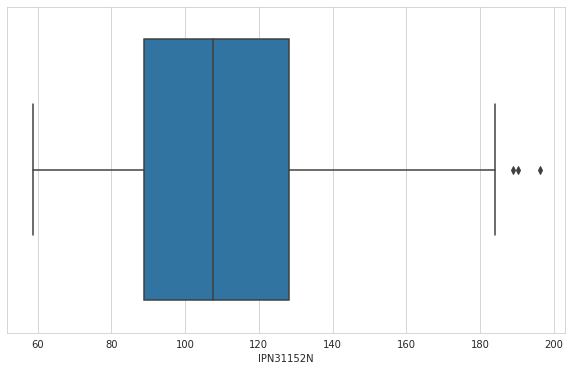

In [ ]:
sns.boxplot(x= "IPN31152N", data=df);

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [ ]:
df.head(10)

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
1972-06-01,100.596
1972-07-01,100.126
1972-08-01,96.361
1972-09-01,85.801


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


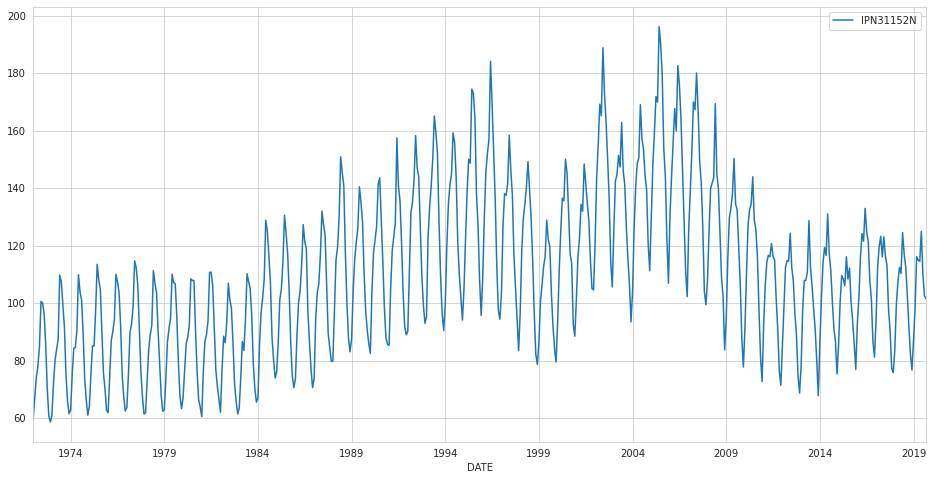

In [ ]:
df.plot(figsize=(16,8))

In [ ]:
df.tail()

,IPN31152N
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IPN31152N,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


In [ ]:
df.isnull().sum().any()

False

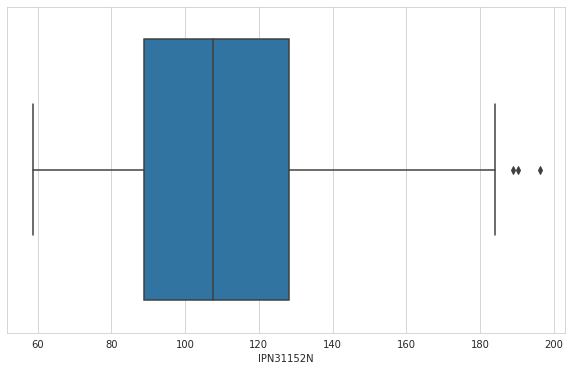

In [ ]:
sns.boxplot(x= "IPN31152N", data=df);

# Preprocessing of Data

In [ ]:
len(df)

573

## Train Test Split

In [ ]:
test_size = 24

In [ ]:
test_ind = len(df)- test_size
test_ind

549

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
train

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [ ]:
test

,IPN31152N
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [ ]:
len(generator)

537

In [ ]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

In [ ]:
X, y = generator[0]


In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
train_scaled.shape

(549, 1)

In [ ]:
n_features = train_scaled.shape[1]

## with "tanh" activation function

In [ ]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [ ]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [ ]:
len(validation_generator)

12

In [ ]:
model.fit_generator(generator, epochs = 10,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/10
537/537 [==============================] - 13s 16ms/step - loss: 0.0214 - val_loss: 0.0025
Epoch 2/10
537/537 [==============================] - 8s 15ms/step - loss: 0.0056 - val_loss: 0.0033
Epoch 3/10
537/537 [==============================] - 8s 15ms/step - loss: 0.0045 - val_loss: 0.0025
Epoch 4/10
537/537 [==============================] - 14s 27ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 5/10
537/537 [==============================] - 13s 24ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 6/10
537/537 [==============================] - 8s 14ms/step - loss: 0.0039 - val_loss: 0.0042


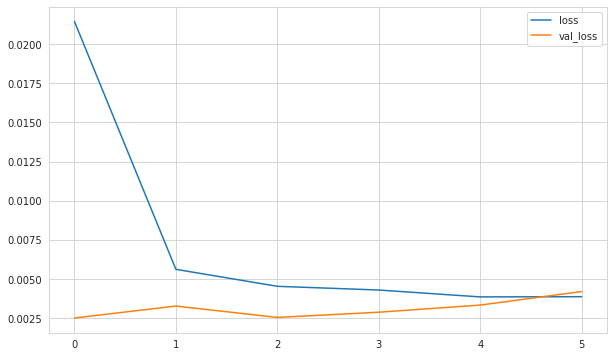

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [ ]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [ ]:
predictions_scaled

[array([0.2659179], dtype=float32),
 array([0.23636912], dtype=float32),
 array([0.25108495], dtype=float32),
 array([0.2979416], dtype=float32),
 array([0.34398726], dtype=float32),
 array([0.3725482], dtype=float32),
 array([0.39083722], dtype=float32),
 array([0.39530084], dtype=float32),
 array([0.39733082], dtype=float32),
 array([0.36794832], dtype=float32),
 array([0.33142927], dtype=float32),
 array([0.28791377], dtype=float32)]

In [ ]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.6047353090469008 
mae: 0.05850440353811707 
mse: 0.004929203188752421 
rmse: 0.07020828433135523


### Inverse Transformation and Comparing

In [ ]:
predictions = scaler.inverse_transform(predictions_scaled)

In [ ]:
compare = test[:12]

In [ ]:
compare['Predictions'] = predictions

In [ ]:
compare

,IPN31152N,Predictions
DATE,,
2017-10-01,90.473,95.227
2017-11-01,77.438,91.164
2017-12-01,75.812,93.187
2018-01-01,83.434,99.631
2018-02-01,99.490,105.963
2018-03-01,107.315,109.890
2018-04-01,112.431,112.405
2018-05-01,110.354,113.019
2018-06-01,124.584,113.298


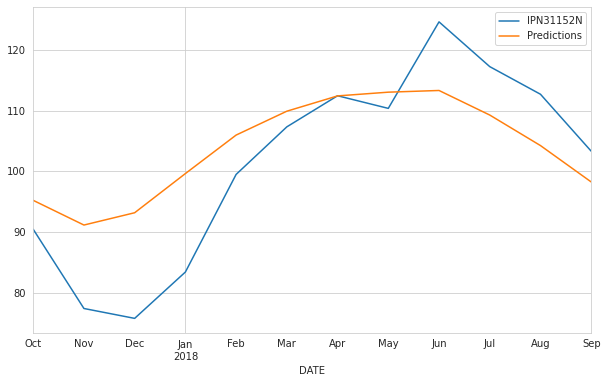

In [ ]:
compare.plot()

## with "relu" activation function

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
n_features = 1

In [ ]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features))) 
model.add(Dense(1))  
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [ ]:
len(validation_generator)

12

In [ ]:
model.fit_generator(generator, epochs = 10,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/10
537/537 [==============================] - 6s 9ms/step - loss: 0.0197 - val_loss: 0.0035
Epoch 2/10
537/537 [==============================] - 4s 7ms/step - loss: 0.0094 - val_loss: 0.0024
Epoch 3/10
537/537 [==============================] - 4s 7ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 4/10
537/537 [==============================] - 4s 7ms/step - loss: 0.0047 - val_loss: 0.0020
Epoch 5/10
537/537 [==============================] - 4s 7ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 6/10
537/537 [==============================] - 4s 7ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 7/10
537/537 [==============================] - 4s 7ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 8/10
537/537 [==============================] - 4s 7ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 9/10
537/537 [==============================] - 4s 7ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 10/10
537/537 [==============================] - 4s 7ms/step - loss: 0.0033 - val_loss: 0.0020

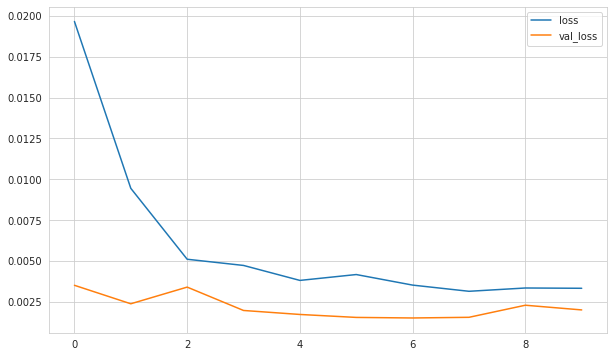

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [ ]:
train_scaled

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

In [ ]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [ ]:
predictions_scaled

[array([0.28189573], dtype=float32),
 array([0.26161557], dtype=float32),
 array([0.27705735], dtype=float32),
 array([0.3310544], dtype=float32),
 array([0.39181703], dtype=float32),
 array([0.44047913], dtype=float32),
 array([0.47652632], dtype=float32),
 array([0.4903013], dtype=float32),
 array([0.48716763], dtype=float32),
 array([0.45594504], dtype=float32),
 array([0.41444635], dtype=float32),
 array([0.36291146], dtype=float32)]

In [ ]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.305233024976033 
mae: 0.07982957343696623 
mse: 0.008664187991267778 
rmse: 0.09308162005072633


### Inverse Transformation and Comparing

In [ ]:
predictions = scaler.inverse_transform(predictions_scaled)
predictions = pd.DataFrame(data=predictions,columns=test.columns)
predictions

,IPN31152N
0,97.424
1,94.636
2,96.759
3,104.184
4,112.540
5,119.232
6,124.189
7,126.083
8,125.652
9,121.359


In [ ]:
test_new = test[:length]
test_new

,IPN31152N
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


In [ ]:
for i in test_new.columns:
    print(i)
    eval_metrics(test_new[i], predictions[i])
    print("--"*15)

IPN31152N
r2_score: 0.30523302497603366 
mae: 10.977675978653627 
mse: 163.8404247425107 
rmse: 12.800016591493572
------------------------------


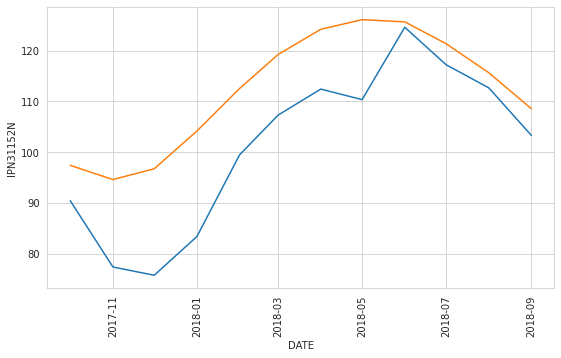

In [ ]:
index = 0
plt.figure(figsize = (20, 30))

for i in test.columns:
    index += 1
    test_eva = pd.DataFrame(test_new[i])
    test_eva["predictions"] = predictions[i].values
    plt.subplot(5, 2, index)
    sns.lineplot(x = test_eva.index, y = test_eva[i])
    sns.lineplot(x = test_eva.index, y = test_eva.predictions)
    plt.xticks(rotation=90);

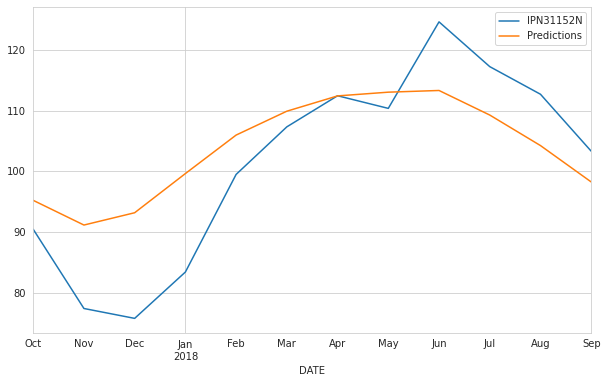

In [ ]:
compare.plot();

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [ ]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x = generator, epochs=10)

Epoch 1/10
561/561 [==============================] - 8s 8ms/step - loss: 0.0194
Epoch 2/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0041
Epoch 3/10
561/561 [==============================] - 5s 8ms/step - loss: 0.0037
Epoch 4/10
561/561 [==============================] - 5s 8ms/step - loss: 0.0036
Epoch 5/10
561/561 [==============================] - 5s 8ms/step - loss: 0.0033
Epoch 6/10
561/561 [==============================] - 5s 9ms/step - loss: 0.0035
Epoch 7/10
561/561 [==============================] - 6s 10ms/step - loss: 0.0030
Epoch 8/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0031
Epoch 9/10
561/561 [==============================] - 6s 11ms/step - loss: 0.0031
Epoch 10/10
561/561 [==============================] - 6s 10ms/step - loss: 0.0030


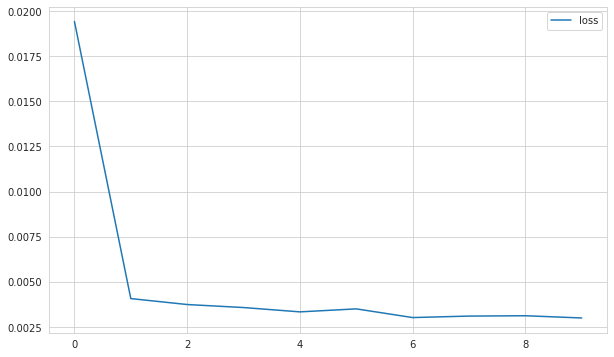

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [ ]:
forecast = full_scaler.inverse_transform(predictions_scaled)
forecast

array([[ 97.4243808 ],
       [ 94.63557793],
       [ 96.75903668],
       [104.18438021],
       [112.54008833],
       [119.23180297],
       [124.18879271],
       [126.08304545],
       [125.65212029],
       [121.35858129],
       [115.65193447],
       [108.5651706 ]])

In [ ]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [ ]:
forecast_index = pd.date_range(start = '2016-05-27 19:00:00', periods = length, freq = 'H')
forecast_index

DatetimeIndex(['2016-05-27 19:00:00', '2016-05-27 20:00:00',
               '2016-05-27 21:00:00', '2016-05-27 22:00:00',
               '2016-05-27 23:00:00', '2016-05-28 00:00:00',
               '2016-05-28 01:00:00', '2016-05-28 02:00:00',
               '2016-05-28 03:00:00', '2016-05-28 04:00:00',
               '2016-05-28 05:00:00', '2016-05-28 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
forecast_df = pd.DataFrame(data = forecast[:,:1], index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2016-05-27 19:00:00,97.424
2016-05-27 20:00:00,94.636
2016-05-27 21:00:00,96.759
2016-05-27 22:00:00,104.184
2016-05-27 23:00:00,112.540
2016-05-28 00:00:00,119.232
2016-05-28 01:00:00,124.189
2016-05-28 02:00:00,126.083
2016-05-28 03:00:00,125.652
2016-05-28 04:00:00,121.359


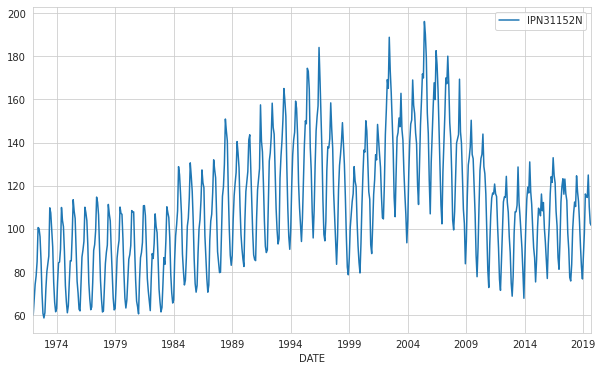

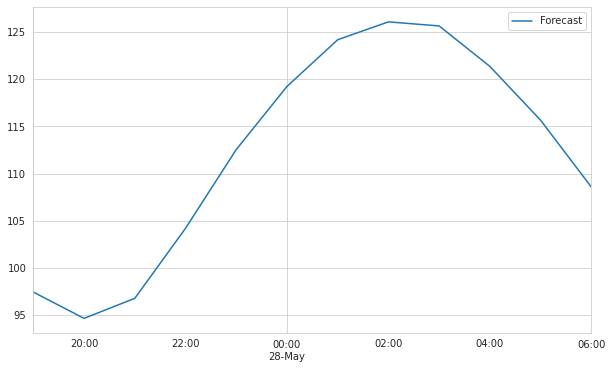

In [ ]:
df.plot()
forecast_df.plot();

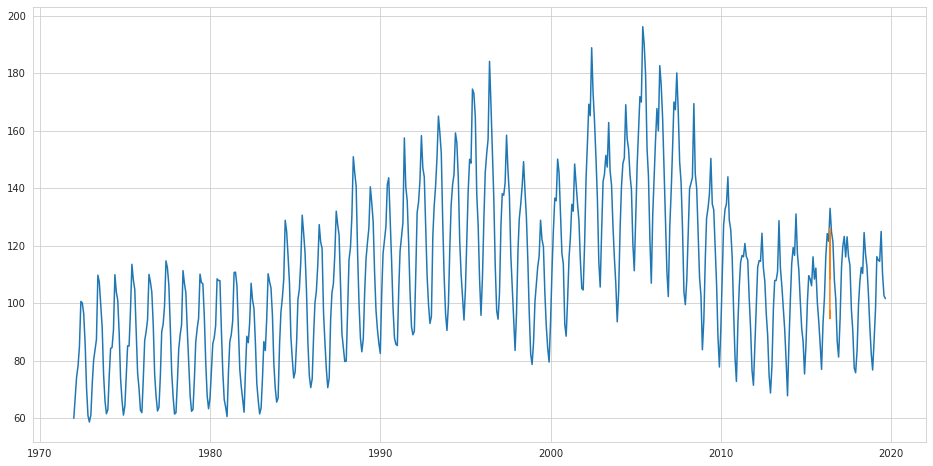

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['IPN31152N'])
plt.plot(forecast_df.index, forecast_df['Forecast'])
#plt.plot(forecast_index, forecast)

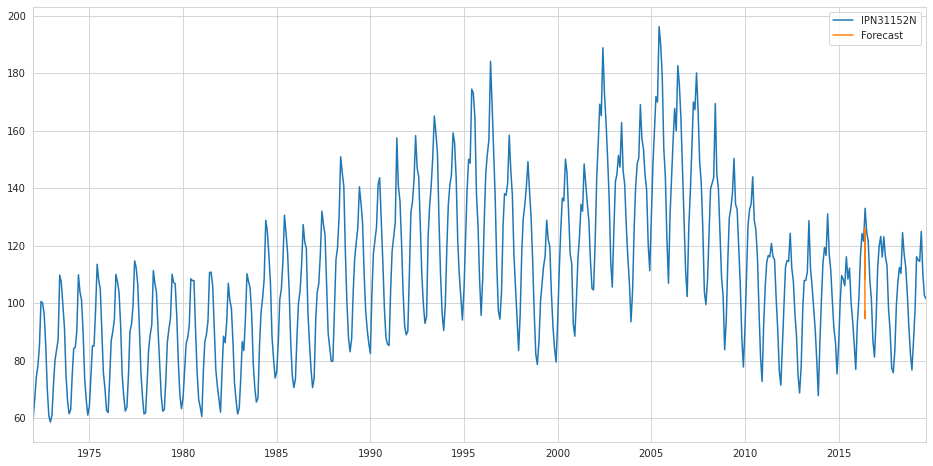

In [ ]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(420768.0, 446328.0)

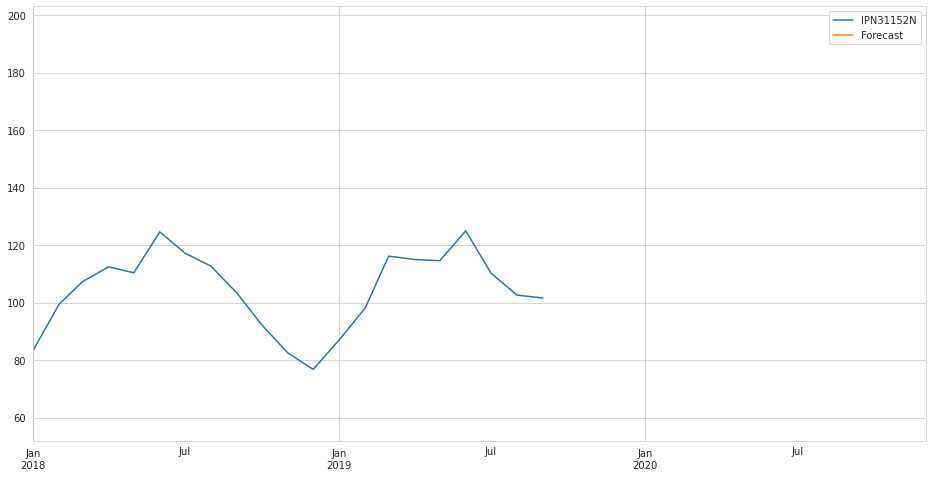

In [ ]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')